# Homework w06d03 - Decision Trees and Ensemble methods

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Load the Boston housing data set

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506L, 13L)


In [3]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [4]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
X = pd.DataFrame(boston['data'],columns=boston.feature_names)
y = pd.Series(boston.target,name='MEDV')

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


#### 2. Rescale the data with the standard scaler 

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
ys = scaler.fit_transform(y.reshape(-1,1))

In [19]:
Xs = pd.DataFrame(Xs,columns=boston.feature_names)
ys = pd.Series(np.ravel(ys),name='MEDV')

#### 3. Fit the data using a decision tree regressor, split into training and test set and obtain mean squared and r2 error for the test set for a maximal tree depth of three.

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

X_train,X_test,y_train,y_test = train_test_split(Xs,ys,test_size=.3,random_state=1)

dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

('MSE', 0.3301057354632555)


#### 4. Visualise the corresponding decision tree

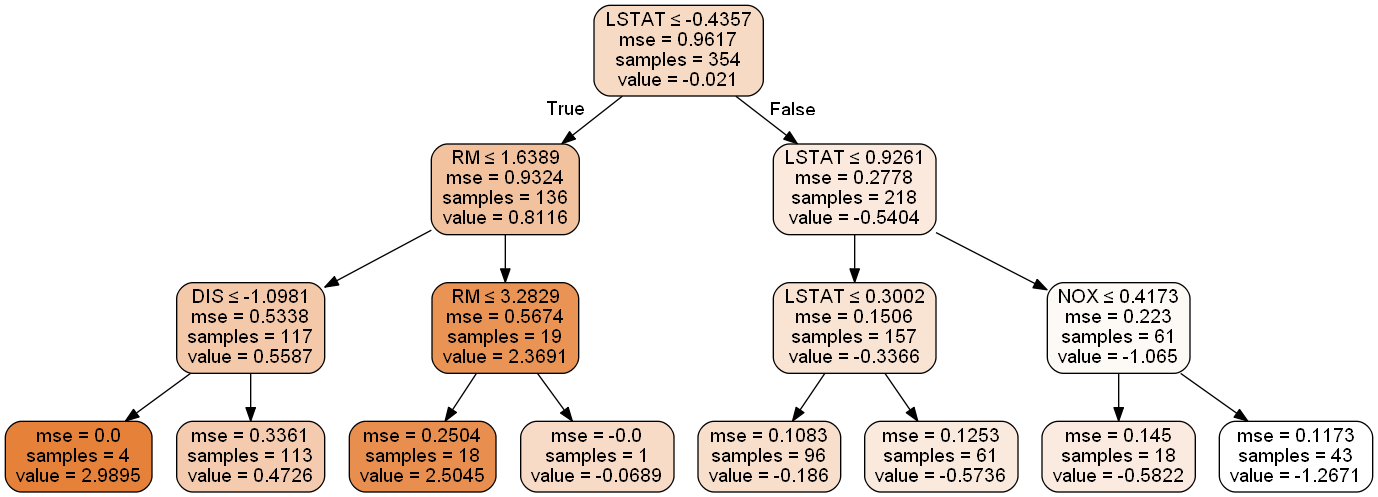

In [21]:
from os import system
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot
dot_data=StringIO()
export_graphviz(dt, out_file=dot_data, 
                         feature_names=X.columns,    
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [22]:
graph[0].write_png('w06d03_decision_tree.png')

True

#### 5. Perform grid search varying the maximal tree depth, the maximal number of leaf nodes and the minimal number of samples in the leafs. Use cross_val_score with five-fold cross validation and scoring 'neg_mean_squared_error'.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

params = {
    'max_depth' : range(1,6),
    'max_leaf_nodes' : range(2,10),
    'min_samples_leaf' : range(1,10)
}

gs = GridSearchCV(dt,params,cv=5,n_jobs=-1)

In [25]:
gs.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [26]:
gs.best_params_

{'max_depth': 3, 'max_leaf_nodes': 9, 'min_samples_leaf': 4}

In [27]:
np.mean(cross_val_score(gs,X,y,cv=5,n_jobs=-1))

0.32450137888701364

In [30]:
best = gs.best_estimator_
kfolds=5
print cross_val_score(best, X, y, cv=kfolds,scoring='r2'), cross_val_score(best, Xs, ys, cv=kfolds,scoring='r2').mean()
print -cross_val_score(best, X, y, cv=kfolds,scoring='neg_mean_squared_error'), -cross_val_score(best, Xs, ys, cv=kfolds,scoring='neg_mean_squared_error').mean()

 [ 0.6869447   0.78677319  0.45794597  0.43631539 -0.17752294] 0.438091262983
[ 10.81142599  19.41147686  42.21792752  49.44182055  31.30835292] 0.365755695089


#### 6. Now use ensemble methods to fit decision trees. For BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor and RandomForestRegressor, vary the number of estimators (n_estimators). Use cross_val_score with five-fold cross validation and scoring 'neg_mean_squared_error'. Plot how the mean of the scoring changes.

In [38]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor

def do_cross_val(model):
    scores = cross_val_score(model, Xs, ys, cv=5, n_jobs=1,scoring='neg_mean_squared_error')
    return -scores.mean()#, scores.std()#, cross_val_score(model, X, y, cv=5, n_jobs=1).mean()

values = sorted(list(set(np.logspace(0, 3, num=20, endpoint=True, base=10.0).astype(int))))

In [40]:
score_list = []
for n in values:
    models = [('Bagging',BaggingRegressor(random_state=1, n_estimators=n,n_jobs=-1)),
          ('RandomForest',RandomForestRegressor(random_state=1, n_estimators=n,n_jobs=-1)),
          ('AdaBoost',AdaBoostRegressor(random_state=1, n_estimators=n)),
          ('ExtraTrees',ExtraTreesRegressor(random_state=1, n_estimators=n,n_jobs=-1))]
    for model in models:
        score = do_cross_val(model[1])
        score_list.append([model[0],n,score])

In [44]:
df_scores = pd.DataFrame(score_list,columns=['model','estimators','mse'])
df_scores.head(8)

,model,estimators,mse
0,Bagging,1,0.419781
1,RandomForest,1,0.415114
2,AdaBoost,1,0.408926
3,ExtraTrees,1,0.672560
4,Bagging,2,0.363526
5,RandomForest,2,0.438611
6,AdaBoost,2,0.409564
7,ExtraTrees,2,0.397884


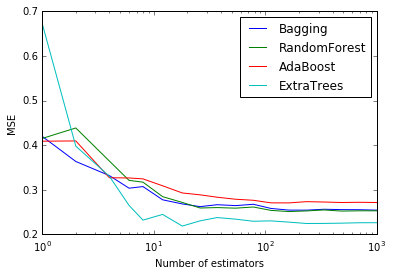

In [42]:
fig, ax = plt.subplots()

for temp in df_scores.model.unique():
    data = df_scores[df_scores['model']==temp]
    ax.plot(data['estimators'], data['mse'], label = "{0}".format(temp))

plt.xlabel("Number of estimators")
plt.ylabel("MSE")
plt.xscale('log')
ax.legend(loc='upper right')
plt.show()

#### Bonus: Vary further parameters and describe the impact on the model score.